In [42]:
#1 preProcessAbstract
!pip install -qq -U gensim

import pandas
import nltk
import re
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
import string
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import numpy as np
import matplotlib.pylab as plt
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from gensim.corpora.dictionary import Dictionary





    
    
Total = pd.read_excel('D:/Backup-05-22-2022/Desktop/excel/Total.xlsx')
abstractPreprocessed=[]

for abstract in Total['abstracts']:
  
    stopwordsRemove=[]
    punctuationRemove=[]
    stemmed_words=[]
    lemmetized_words=[]
    absPrepJoin=[]
    
    abstractLower=abstract.lower()
    numberRemove=re.sub(r'\d+', '', abstractLower)
    wordTokenize=word_tokenize(numberRemove)  
    
    for w in wordTokenize:
        if w not in stop_words:
            stopwordsRemove.append(w)
            
    for character in stopwordsRemove:
        if character not in string.punctuation:
            punctuationRemove.append(character)

            
    for token in punctuationRemove:
        stemmed_words.append(stemmer.stem(token))
   
    for token in stemmed_words:
        lemmetized_words.append(lemmatizer.lemmatize(token))
    
    abstractPreprocessed.append(lemmetized_words)
# print(abstractPreprocessed,'\n')
# print(abstractPreprocessed[1])


# joinedAbstractPreprocessed=[]
# joined=[]
# for i in range(93):
#     joined=' '.join(abstractPreprocessed[i])
#     joinedAbstractPreprocessed.append(joined)
# # #     print('abstract',i,':','\n',joinedAbstractPreprocessed,'\n')
# data={'joinedAbstractPreprocessed':joinedAbstractPreprocessed}
# df= pandas.DataFrame(data)
# print(df)
# print('***********************************************')

# wordfreq = {}
# for abs in  abstractPreprocessed:
#     for token in abs:
#         if token not in wordfreq.keys():
#             wordfreq[token] = 1
#         else:
#             wordfreq[token] += 1
            
            



# sorted_dict = {}
# sorted_keys = sorted(wordfreq, key=wordfreq.get,reverse=True)  

# for w in sorted_keys:
#     sorted_dict[w] = wordfreq[w]
# print(sorted_dict)
# print('***********************************************')
# nMostFrequent={}
# for key in sorted_dict:
#     if sorted_dict[key]>35:
#         nMostFrequent[key]=sorted_dict[key]
# print(nMostFrequent)


# keys = nMostFrequent.keys()
# values = nMostFrequent.values()
# plt.xticks(rotation='vertical')
# # plt.xticks(fontsize=9)
# plt.grid()
# plt.bar(keys, values)





# print('***********************************************')
# print('len(wordfreq)=',len(wordfreq))
# print('len(abstractPreprocessed)=',len(abstractPreprocessed))
# print('len(abstractPreprocessed[0]=',len(abstractPreprocessed[0]))
# print('len(abstractPreprocessed[1]=',len(abstractPreprocessed[1]))
# print('len(abstractPreprocessed[2]=',len(abstractPreprocessed[2]))
# print('***********************************************')




# ***********************************************
# ***********************************************
# ***********************************************
# ***********************************************
# ***********************************************
# ***********************************************
# ***********************************************


dictionary = Dictionary(abstractPreprocessed)
print(dictionary)
print('***********************************************')
print(dictionary.token2id)
dictionary.filter_extremes(no_below=5, no_above=0.7,keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in abstractPreprocessed]
from gensim.models import LdaMulticore
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)
print('*********************************************************************************************************************************************')
print('*********************************************************************************************************************************************')

lda_model.print_topics(-1)


# print('*********************************************************************************************************************************************')


# !pip install pyLDAvis -qq
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

Dictionary<2022 unique tokens: ['accept', 'advantag', 'also', 'among', 'applic']...>
***********************************************
{'accept': 0, 'advantag': 1, 'also': 2, 'among': 3, 'applic': 4, 'approach': 5, 'aris': 6, 'block': 7, 'blockchain': 8, 'blockchain-bas': 9, 'central': 10, 'chain': 11, 'clarifi': 12, 'client': 13, 'cloud-bas': 14, 'compar': 15, 'comprehens': 16, 'consensu': 17, 'consist': 18, 'contract': 19, 'control': 20, 'cost': 21, 'creat': 22, 'custom': 23, 'data': 24, 'decentr': 25, 'differ': 26, 'direct': 27, 'discus': 28, 'disrupt': 29, 'distribut': 30, 'durat': 31, 'elimin': 32, 'encrypt': 33, 'end-to-end': 34, 'exist': 35, 'explor': 36, 'failur': 37, 'file': 38, 'final': 39, 'first': 40, 'form': 41, 'fulli': 42, 'futur': 43, 'group': 44, 'hardwar': 45, 'help': 46, 'implement': 47, 'introduc': 48, 'need': 49, 'network': 50, 'new': 51, 'next': 52, 'node': 53, 'one': 54, 'overview': 55, 'paper': 56, 'parti': 57, 'pay': 58, 'peer-to-p': 59, 'peopl': 60, 'point': 61,

*********************************************************************************************************************************************
*********************************************************************************************************************************************


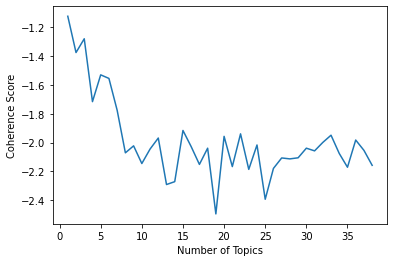

In [17]:
# from gensim.models import CoherenceModel
# topics = []
# score = []
# for i in range(1,39,1):
#    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
#    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
#    topics.append(i)
#    score.append(cm.get_coherence())
# _=plt.plot(topics, score)
# _=plt.xlabel('Number of Topics')
# _=plt.ylabel('Coherence Score')
# plt.show()



In [39]:
lda_model[corpus][0]

[(3, 0.35592213), (8, 0.6358279)]

In [37]:
Total['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(Total['abstracts']))]
print(Total['topic'])
Total.topic.value_counts()


0     1
1     6
2     8
3     6
4     1
     ..
88    5
89    0
90    4
91    7
92    5
Name: topic, Length: 93, dtype: int64


1    38
6    10
4    10
8     7
7     7
5     7
2     5
9     3
0     3
3     3
Name: topic, dtype: int64